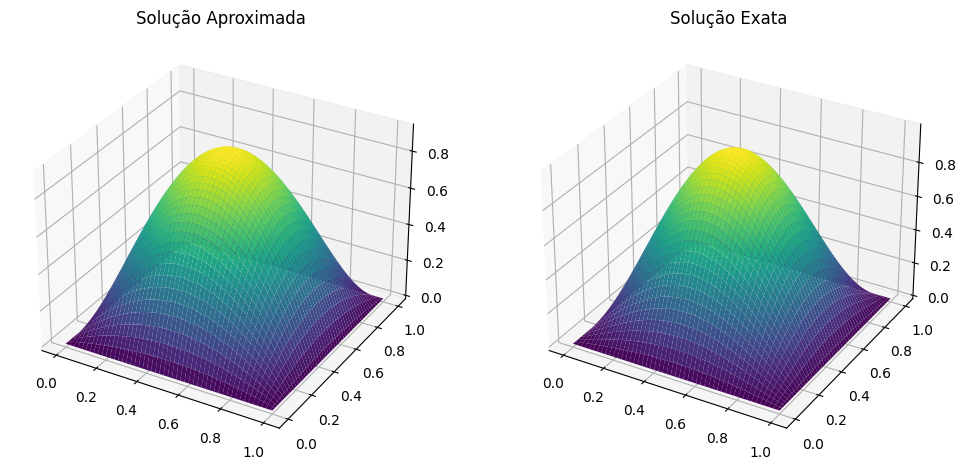

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Definir as funções-base e suas derivadas
def phi1(x, y):
    return x * (x - 1) * y * (y - 1)

def phi2(x, y):
    return x**2 * (x - 1) * y * (y - 1)

def phi3(x, y):
    return x * (x - 1) * y**2 * (y - 1)

def phi4(x, y):
    return x**2 * (x - 1) * y**2 * (y - 1)

def dphi1_dx(x, y):
    return (2 * x - 1) * y * (y - 1)

def dphi1_dy(x, y):
    return x * (x - 1) * (2 * y - 1)

def dphi2_dx(x, y):
    return (3 * x**2 - 2 * x) * y * (y - 1)

def dphi2_dy(x, y):
    return x**2 * (x - 1) * (2 * y - 1)

def dphi3_dx(x, y):
    return (2 * x - 1) * y**2 * (y - 1)

def dphi3_dy(x, y):
    return x * (x - 1) * (3 * y**2 - 2 * y)

def dphi4_dx(x, y):
    return (3 * x**2 - 2 * x) * y**2 * (y - 1)

def dphi4_dy(x, y):
    return x**2 * (x - 1) * (3 * y**2 - 2 * y)

# Função do lado direito
def f(x, y):
    return (2 * np.pi**2 + 1) * np.sin(np.pi * x) * np.sin(np.pi * y)

# Lista de funções-base e suas derivadas
phis = [phi1, phi2, phi3, phi4]
dphis_dx = [dphi1_dx, dphi2_dx, dphi3_dx, dphi4_dx]
dphis_dy = [dphi1_dy, dphi2_dy, dphi3_dy, dphi4_dy]

# Número de funções-base
n = len(phis)

# Inicializar a matriz A e o vetor f
A = np.zeros((n, n))
f_vec = np.zeros(n)

# Definir os limites de integração
a, b = 0, 1

# Construir a matriz A e o vetor f usando integração numérica
for i in range(n):
    for j in range(n):
        integrand = lambda x, y: dphis_dx[i](x, y) * dphis_dx[j](x, y) + dphis_dy[i](x, y) * dphis_dy[j](x, y) + phis[i](x, y) * phis[j](x, y)
        A[i, j], _ = dblquad(integrand, a, b, lambda x: a, lambda x: b)
    integrand_f = lambda x, y: f(x, y) * phis[i](x, y)
    f_vec[i], _ = dblquad(integrand_f, a, b, lambda x: a, lambda x: b)

# Resolver o sistema linear
w = np.linalg.solve(A, f_vec)

# Definir a solução aproximada
def u_h(x, y):
    return sum(w[i] * phis[i](x, y) for i in range(n))

# Solução exata
def u_e(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Valores de x e y para o gráfico
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z_h = np.vectorize(u_h)(X, Y)
Z_e = u_e(X, Y)

# Plotar as soluções exata e aproximada
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_h, cmap='viridis')
ax1.set_title('Solução Aproximada')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_e, cmap='viridis')
ax2.set_title('Solução Exata')

plt.show()
